In [1]:
import h5py
import matplotlib.pyplot as plt
from   matplotlib.backends.backend_pdf import PdfPages
import numpy as np
import os
import pandas as pd
import re

# Preliminary

In [2]:
DATA_DIR = '/lhome/ific/c/ccortesp/Analysis/Muon_Veto/data/DAQ_parameters/'

In [28]:
def COMPUTE_RATE_FILE(FILE_PATH):
    """
    Helper function to calculate the event rate from a single HDF5 file.

    This function reads an HDF5 file containing event data, computes the event rate 
    (events per second), and calculates the associated error. The event rate is 
    determined based on the timestamps of the events in the file.

    Parameters:
    -----------
    FILE_PATH : str
        Path to the HDF5 file containing the event data.

    Returns:
    --------
    tuple
        A tuple containing:
        - Rate_CV (float): The calculated event rate (events per second).
        - Rate_Err (float): The error in the calculated event rate.
        If the time difference is invalid or an error occurs, returns (-1, -1).
    """
    # HDF5 key to access the data
    h5_key = 'data'

    try:
        # Read the HDF5 file into a DataFrame
        data_df = pd.read_hdf(FILE_PATH, key=h5_key)

        # Check if the DataFrame is not empty and contains the 'timestamp' column
        if not data_df.empty and 'timestamp' in data_df.columns:
                
            # Sort the DataFrame by timestamp to ensure correct chronological order
            data_df = data_df.sort_values(by='timestamp').reset_index(drop=True)
            
            # Extract the first and last timestamps
            first_timestamp = data_df['timestamp'].iloc[0]
            last_timestamp = data_df['timestamp'].iloc[-1]
            
            time_difference = (last_timestamp - first_timestamp) * 0.001        # in [s]

            # Calculate the event count and its error
            evt_CV = len(data_df)
            evt_err = np.sqrt(evt_CV)

            # Ensure the time difference is valid before calculating the rate
            if time_difference > 0:
                Rate_CV  = evt_CV / time_difference
                Rate_Err = evt_err / time_difference

                return Rate_CV, Rate_Err
            else:
                # Invalid time difference, return error values
                return -1, -1

    # Handle specific errors
    except KeyError:
        print(f"Warning: HDF5 key '{h5_key}' not found in file {FILE_PATH}. Skipping this file.")
    except Exception as e:
        print(f"An error occurred while processing {FILE_PATH}: {e}")

    # Return error values in case of failure
    return -1, -1

def PLOT_CHARGE_HIST_FILE(FILE_PATH, PLOT_LABEL, SIGNAL_CHANNELS=[6, 7], X_LIMITS=[0, 2000]):
    """
    Helper function to plot the charge histogram from a single HDF5 file.

    This function reads charge data from an HDF5 file and generates a histogram 
    for the charge distribution of specified channels. The histogram includes 
    a control/noise channel and two active signal channels. The function also 
    allows setting custom x-axis limits for the histogram.

    Parameters:
    -----------
    FILE_PATH : str
        Path to the HDF5 file containing the charge data.
    PLOT_LABEL : str
        Label for the plot title, typically describing the dataset or file.
    SIGNAL_CHANNELS : list of int, optional
        List of two integers specifying the indices of the active signal channels 
        to be plotted. Default is [6, 7].
    X_LIMITS : list of int, optional
        List of two integers specifying the x-axis limits for the histogram. 
        Default is [0, 2000].

    Returns:
    --------
    None
        The function generates and displays a histogram plot. It does not return any value.
    """
    try:
        # Open the HDF5 file in read mode
        with h5py.File(FILE_PATH, "r") as f:

            # Check if the 'charges' dataset exists in the file
            if 'charges' not in f:
                print(f"Warning: 'charges' dataset not found in {FILE_PATH}.")
                return

            # Read the 'charges' dataset into a NumPy array
            charges_df = f["charges"][:]
                
            # Extract charge data for the control/noise channel and the two signal channels
            charge_control = charges_df[:, 5]
            charge_signal_1 = charges_df[:, SIGNAL_CHANNELS[0]]
            charge_signal_2 = charges_df[:, SIGNAL_CHANNELS[1]]  # Second signal channel

            # ----- Plotting ----- #
            # Define histogram bins with a fixed width of 10 ADC counts
            bins = np.arange(X_LIMITS[0], X_LIMITS[1] + 10, 10)

            # Set the plot style
            plt.style.use('ggplot')
            plt.figure(figsize=(8, 6))    
            
            # Plot histograms for each channel
            plt.hist(charge_control,  bins=bins, histtype='step', color='red',   linewidth=1.0, alpha=1.0, label='Noise')
            plt.hist(charge_signal_1, bins=bins, histtype='step', color='blue',  linewidth=1.0, alpha=1.0, label=f'Channel {SIGNAL_CHANNELS[0]} (Active)')
            plt.hist(charge_signal_2, bins=bins, histtype='step', color='green', linewidth=1.0, alpha=1.0, label=f'Channel {SIGNAL_CHANNELS[1]} (Active)')

            # Add labels, title, and legend
            plt.xlabel('Charge (ADC)')
            plt.ylabel('Counts')
            plt.yscale('log')
            plt.legend()
            plt.title(f'{PLOT_LABEL}')
            
            # Add grid and adjust layout
            plt.grid(True, which='both', linestyle='--', alpha=0.5)
            plt.tight_layout()
            plt.show()

    except Exception as e:
        # Handle any exceptions that occur during file reading or plotting
        print(f"An error occurred while processing {FILE_PATH}: {e}")

# DAC Scan

--- Processin Run 1 ---
    Rate = 77.07 +/- 1.05 Hz


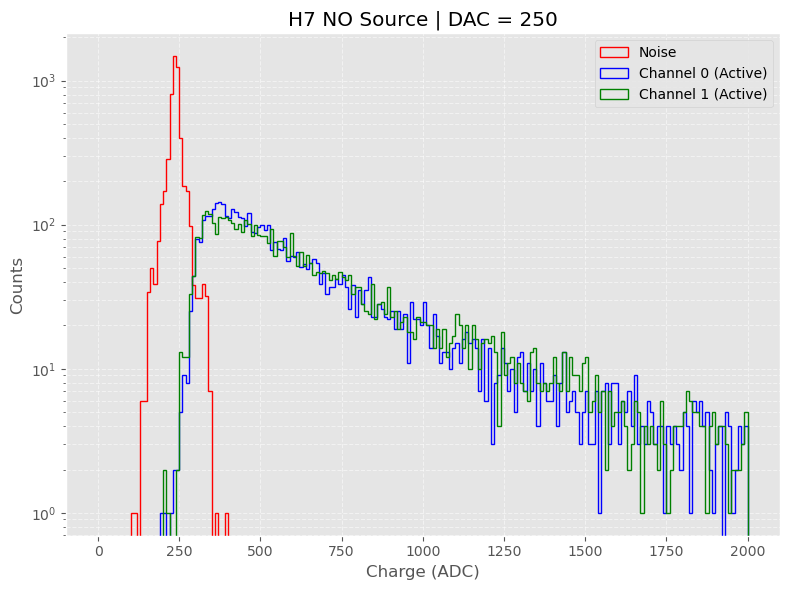

--- Processin Run 2 ---
    Rate = 42.30 +/- 0.57 Hz


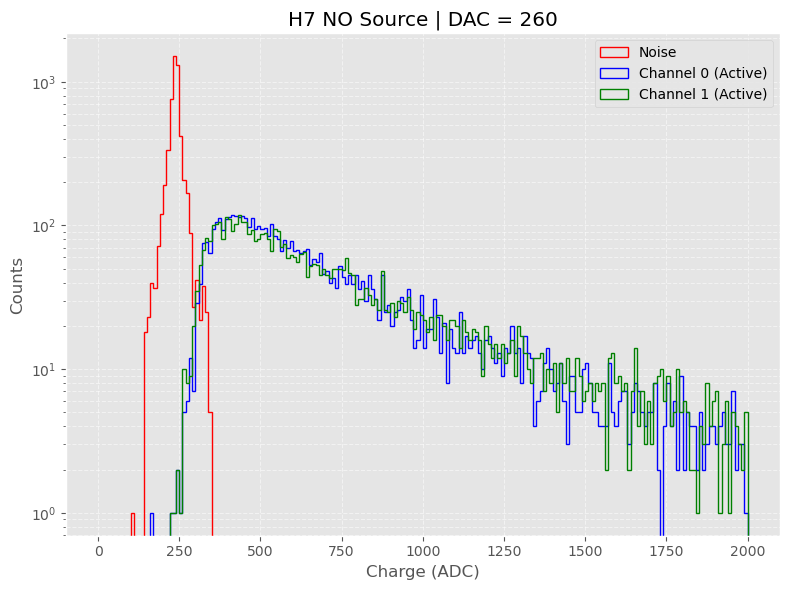

--- Processin Run 3 ---
    Rate = 48.20 +/- 0.67 Hz


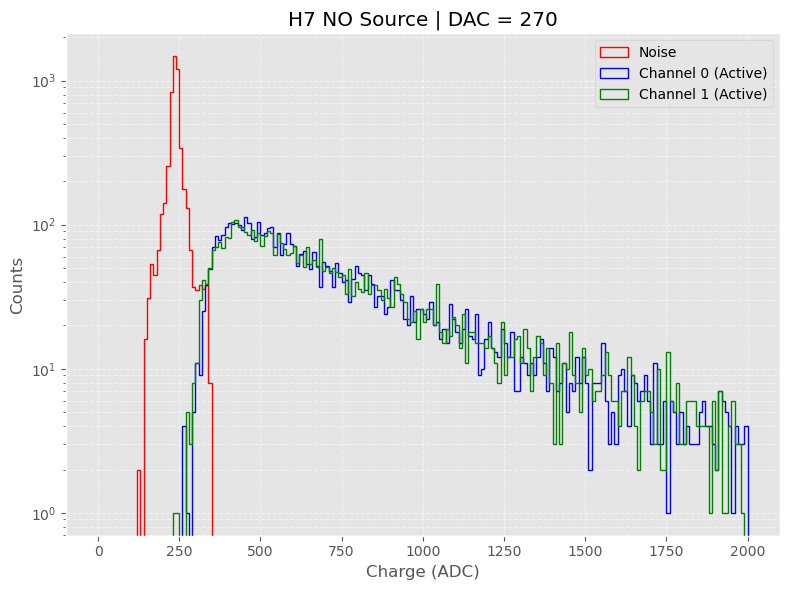

--- Processin Run 4 ---
    Rate = 48.14 +/- 0.63 Hz


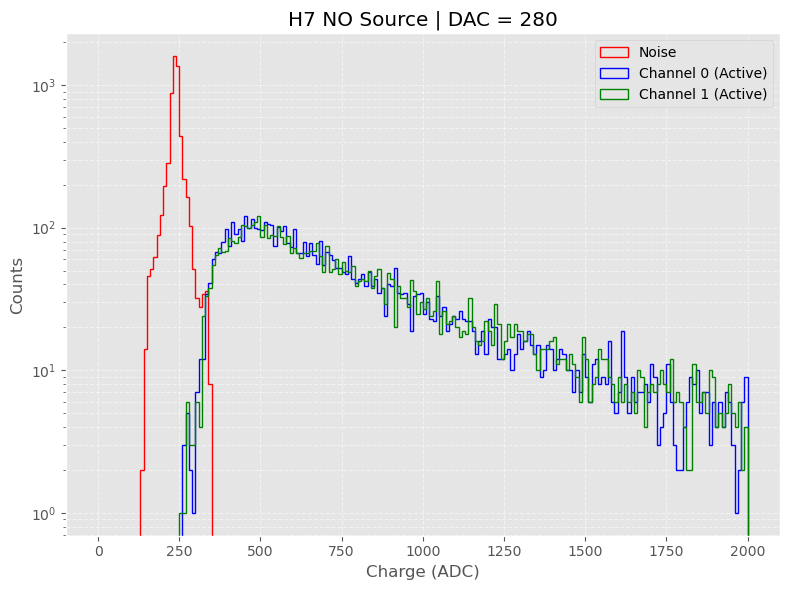

--- Processin Run 5 ---
    Rate = 46.85 +/- 0.64 Hz


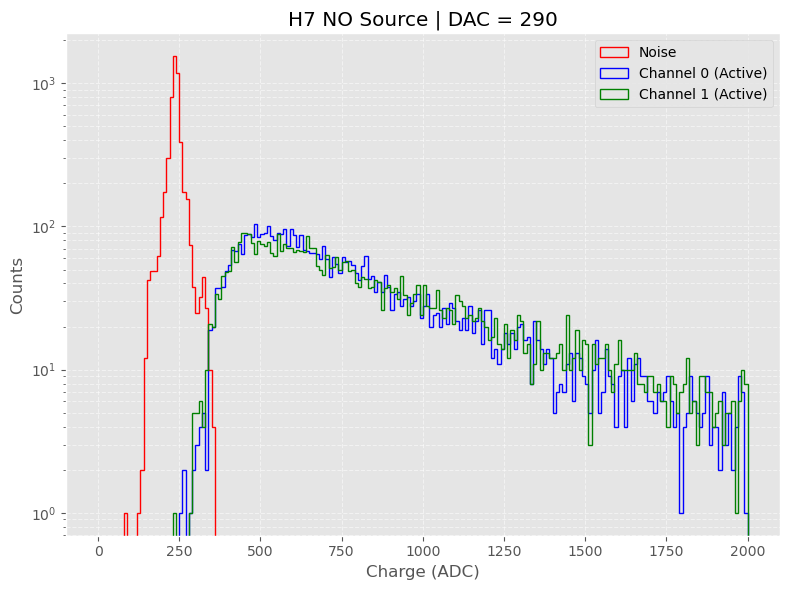

--- Processin Run 6 ---
    Rate = 38.38 +/- 0.51 Hz


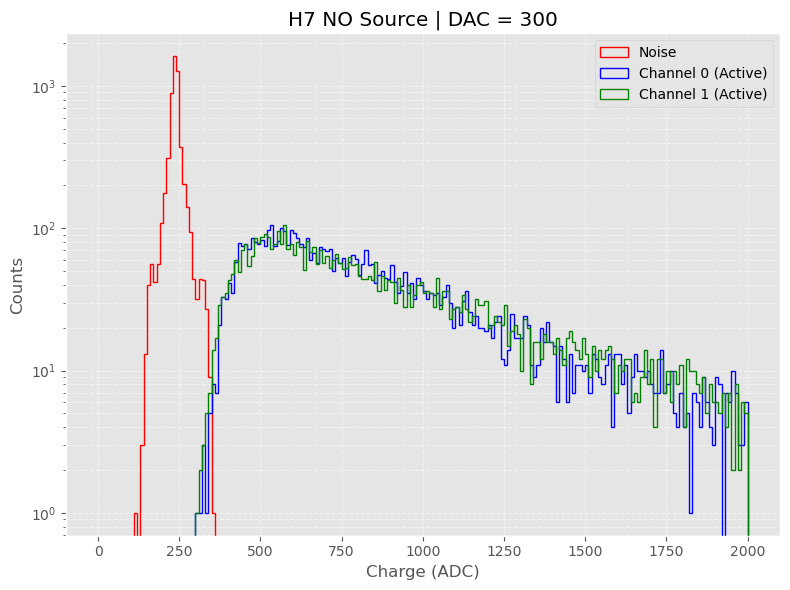

--- Processin Run 7 ---
    Rate = 29.76 +/- 0.42 Hz


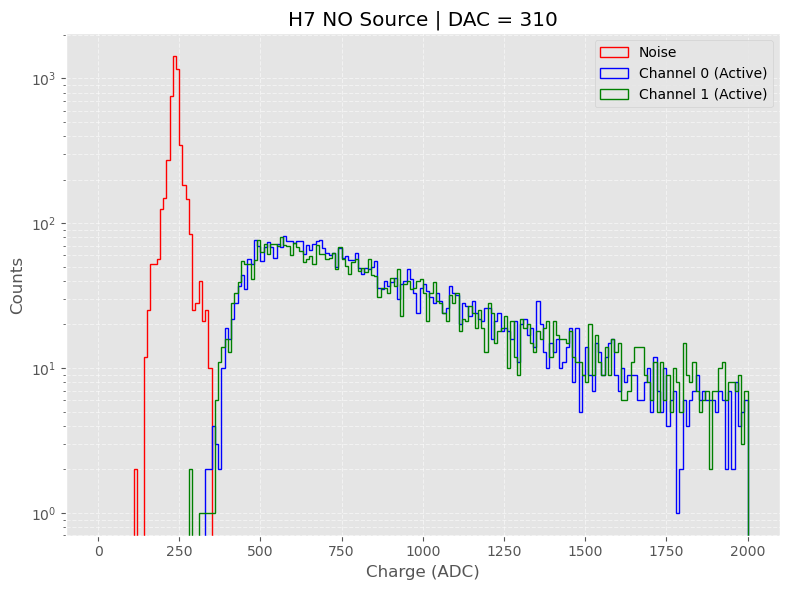

--- Processin Run 8 ---
    Rate = 31.72 +/- 0.45 Hz


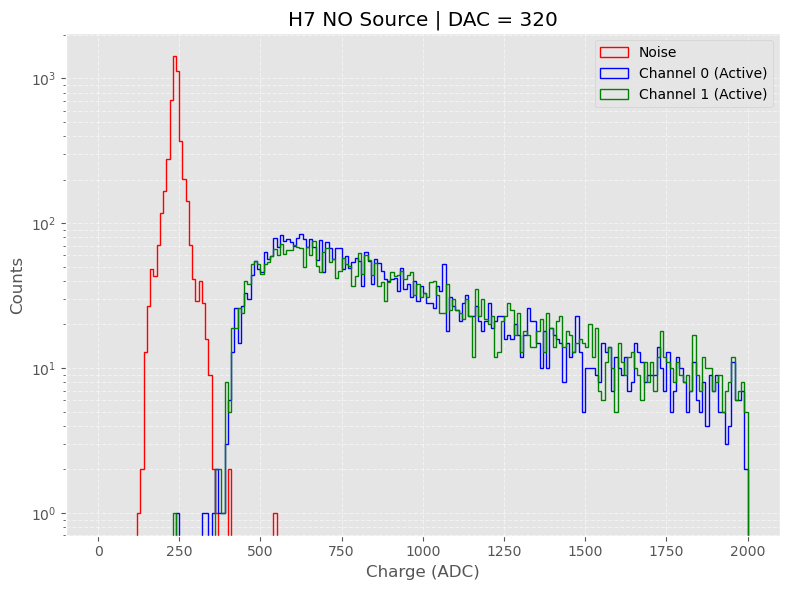

--- Processin Run 9 ---
    Rate = 27.28 +/- 0.35 Hz


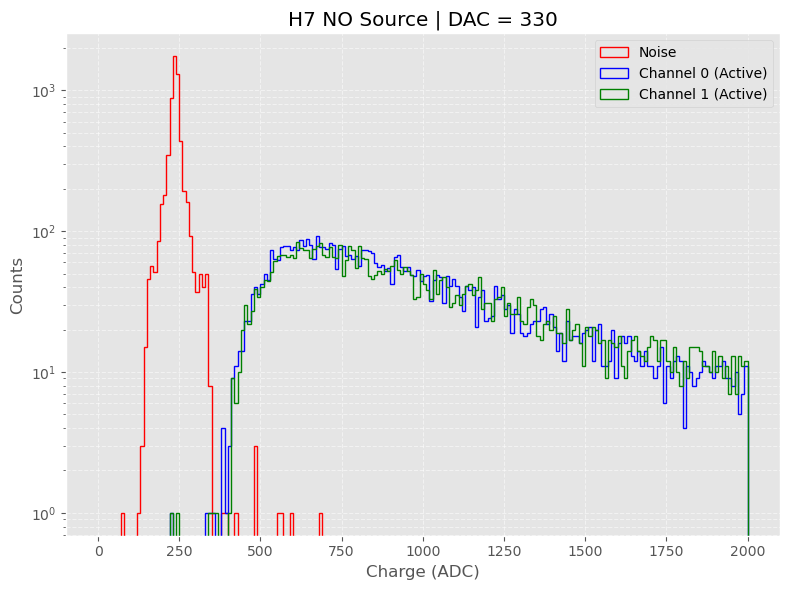

--- Processin Run 10 ---
    Rate = 22.68 +/- 0.32 Hz


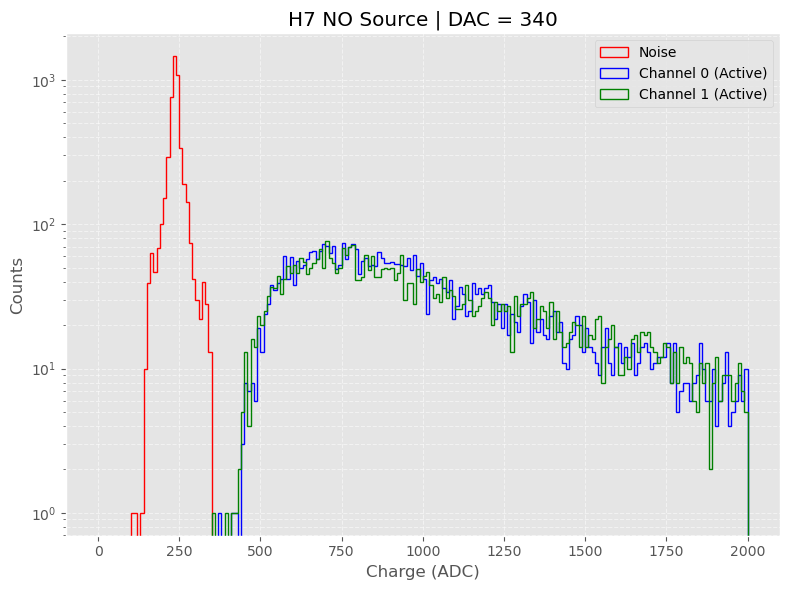

--- Processin Run 11 ---
    Rate = 20.29 +/- 0.28 Hz


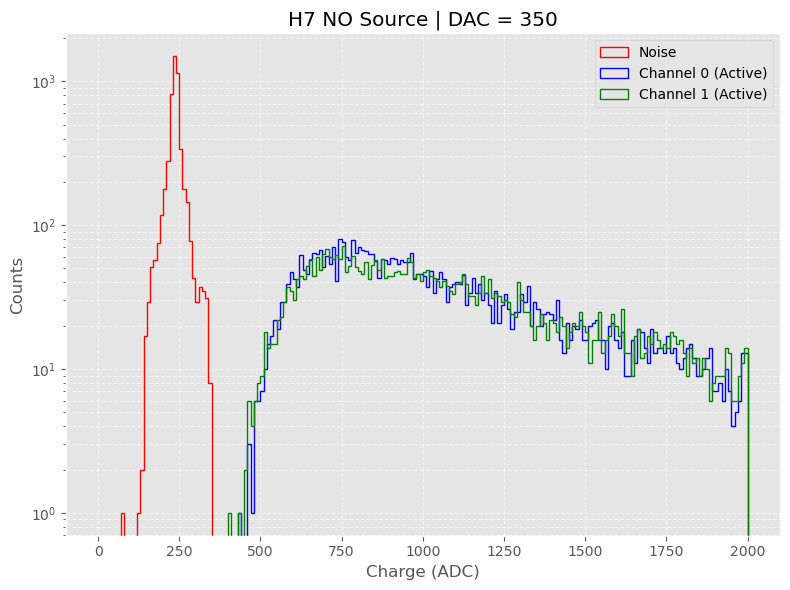

--- Processin Run 12 ---
    Rate = 16.20 +/- 0.23 Hz


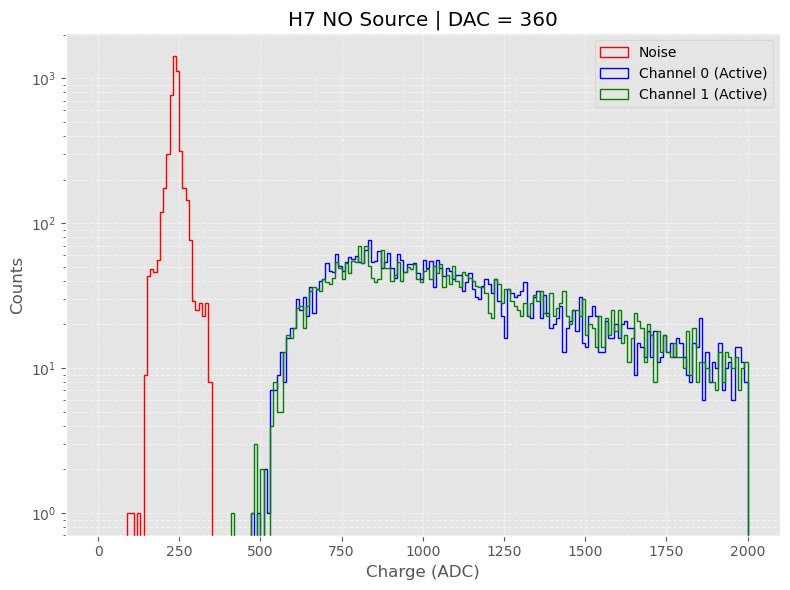

--- Processin Run 13 ---
    Rate = 13.37 +/- 0.19 Hz


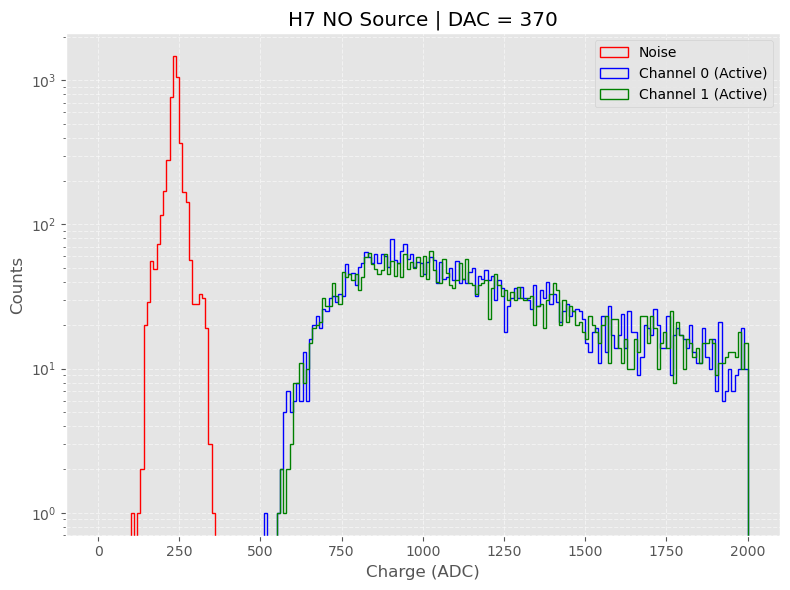

--- Processin Run 14 ---
    Rate = 10.14 +/- 0.14 Hz


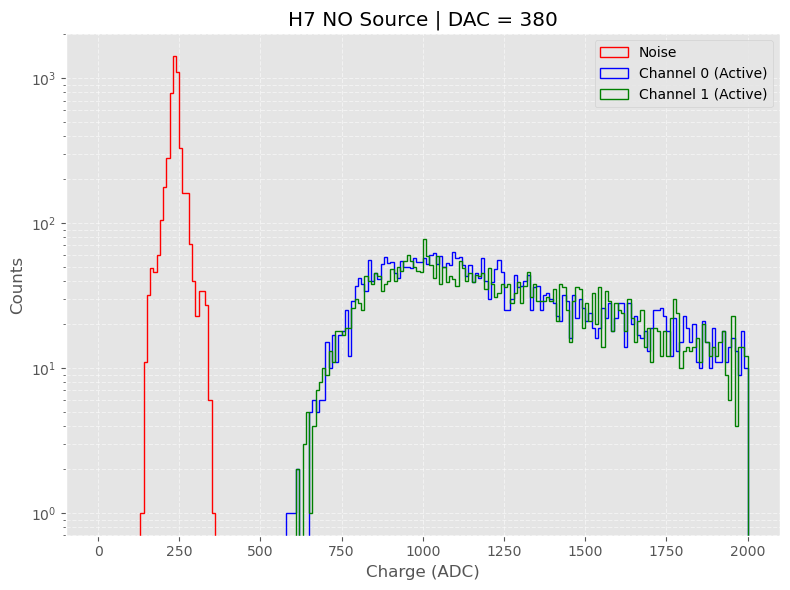

--- Processin Run 15 ---
    Rate = 6.68 +/- 0.09 Hz


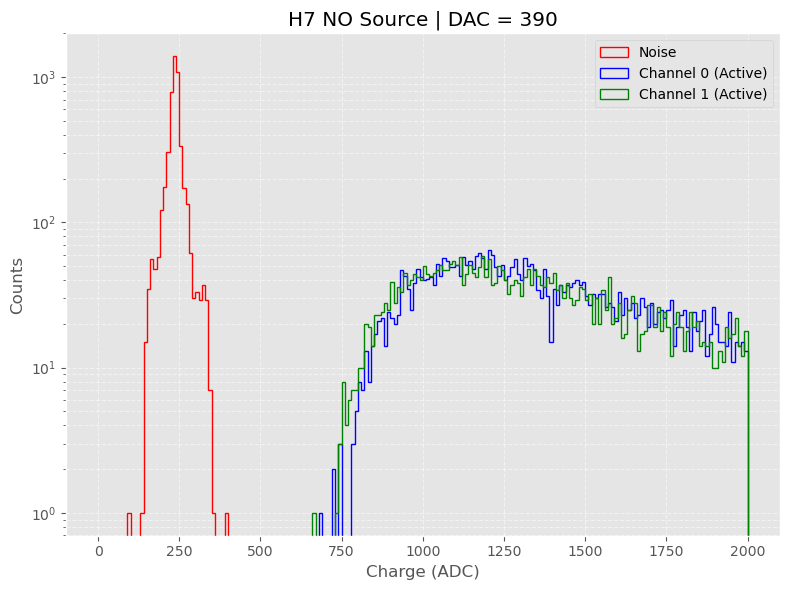

--- Processin Run 16 ---
    Rate = 436.38 +/- 5.45 Hz


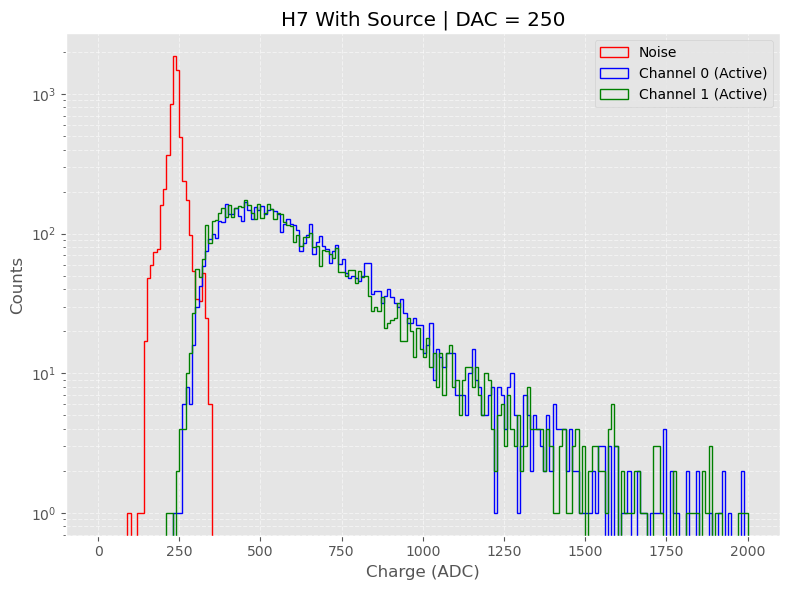

--- Processin Run 17 ---
    Rate = 45.92 +/- 0.61 Hz


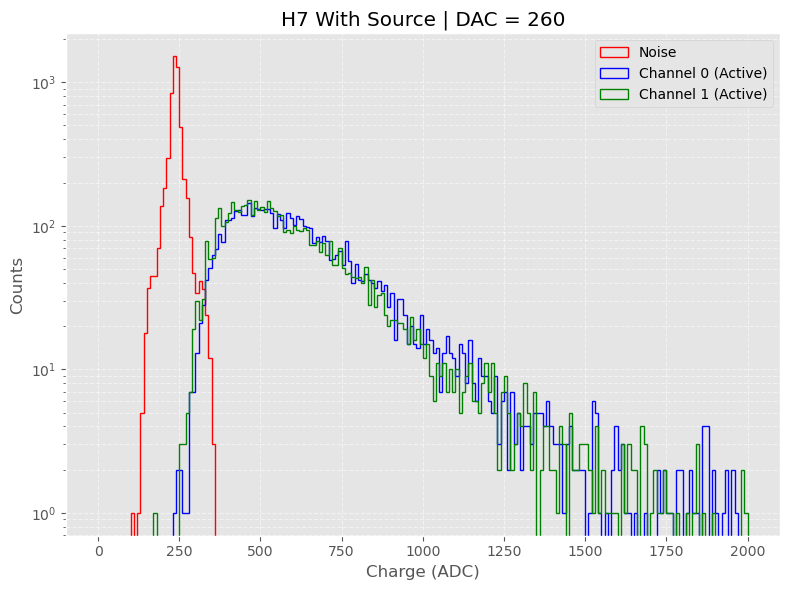

--- Processin Run 18 ---
    Rate = 159.76 +/- 1.98 Hz


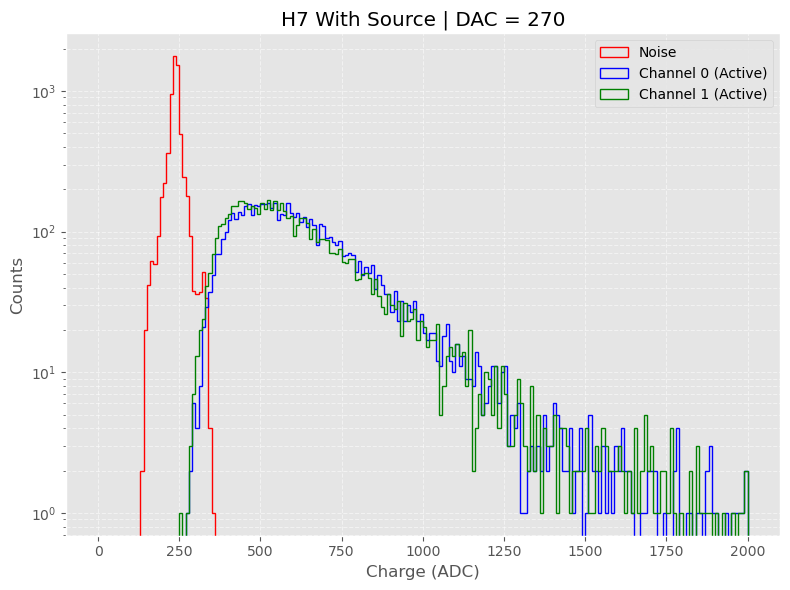

--- Processin Run 19 ---
    Rate = 217.80 +/- 2.94 Hz


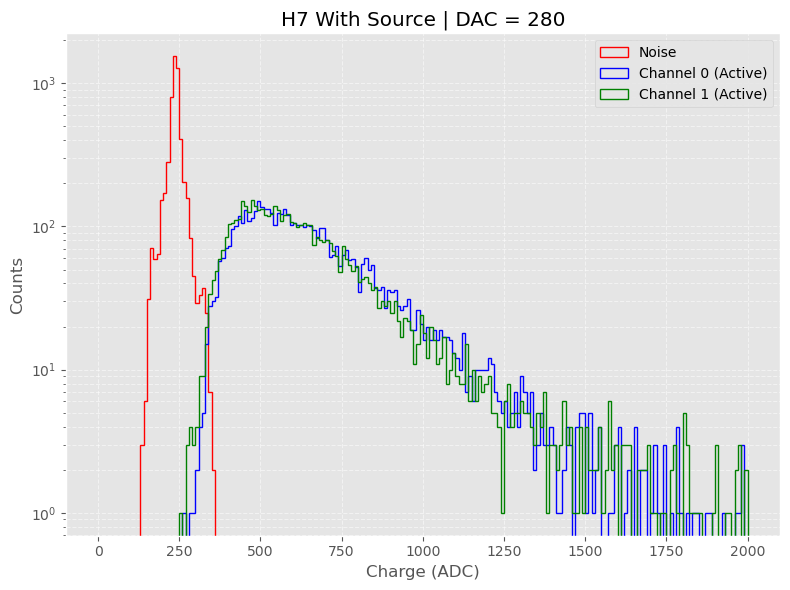

--- Processin Run 20 ---
    Rate = 274.33 +/- 3.76 Hz


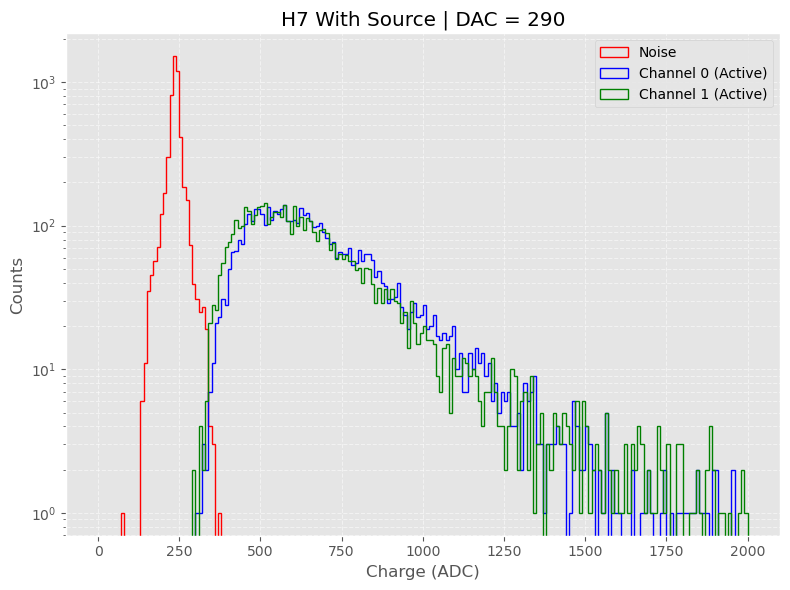

--- Processin Run 21 ---
    Rate = 113.30 +/- 1.55 Hz


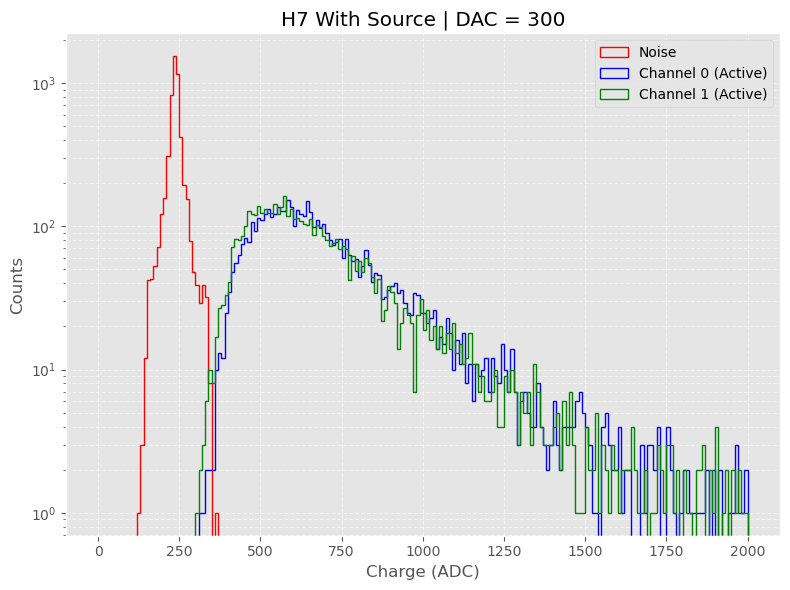

--- Processin Run 22 ---
    Rate = 203.21 +/- 2.80 Hz


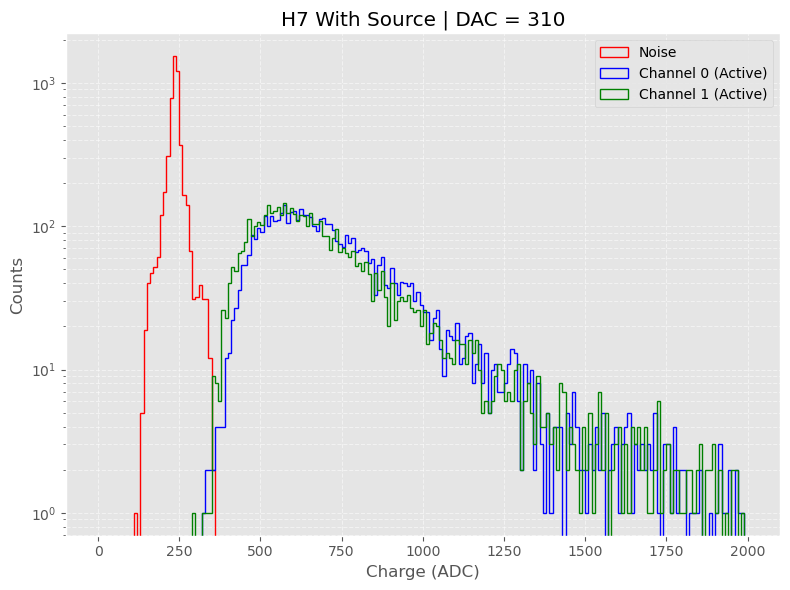

--- Processin Run 23 ---
    Rate = 163.18 +/- 2.23 Hz


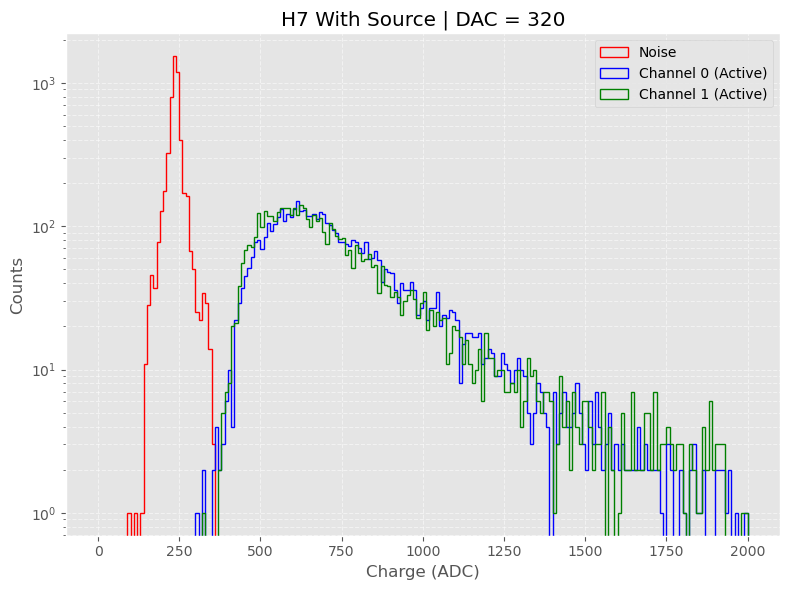

--- Processin Run 24 ---
    Rate = 102.88 +/- 1.44 Hz


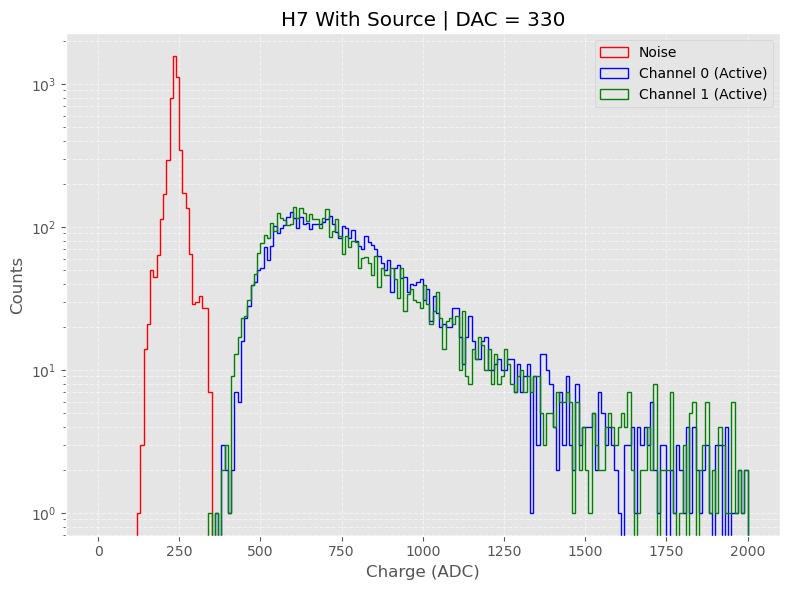

--- Processin Run 25 ---
    Rate = 83.69 +/- 1.16 Hz


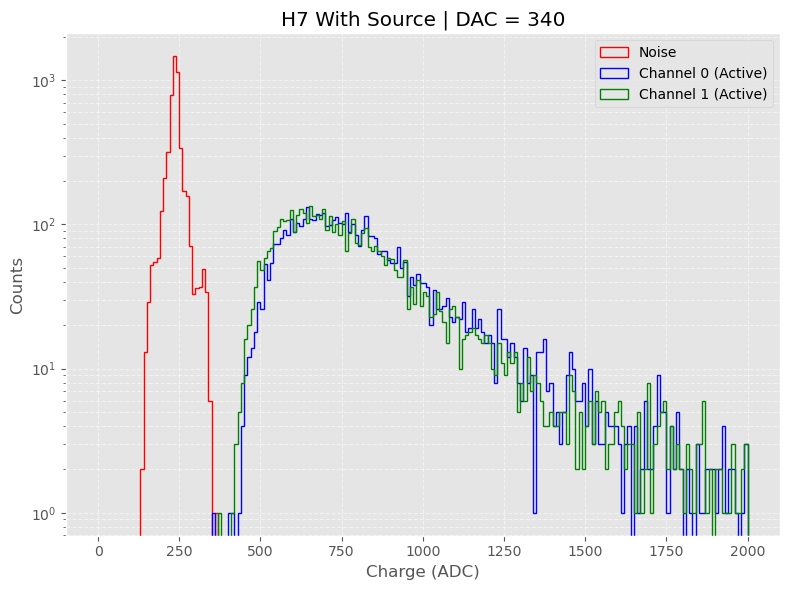

--- Processin Run 26 ---
    Rate = 60.85 +/- 0.85 Hz


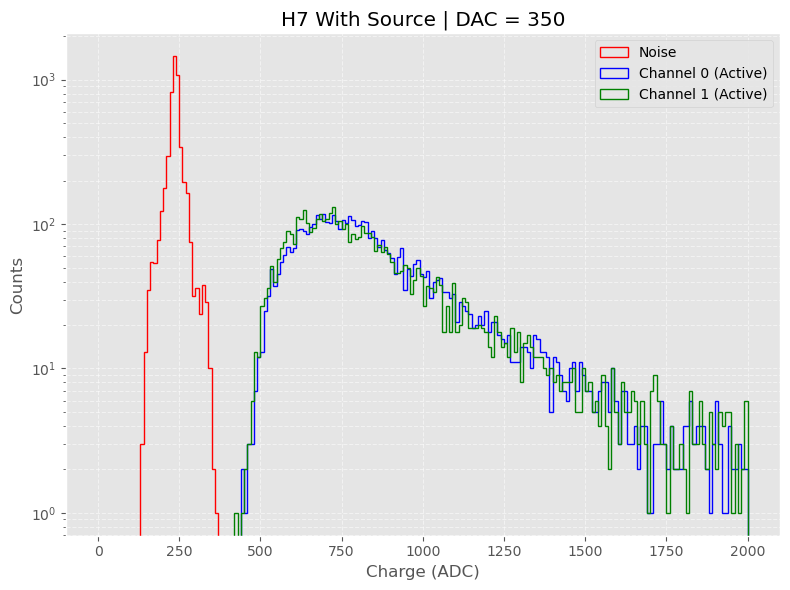

--- Processin Run 27 ---
    Rate = 45.45 +/- 0.64 Hz


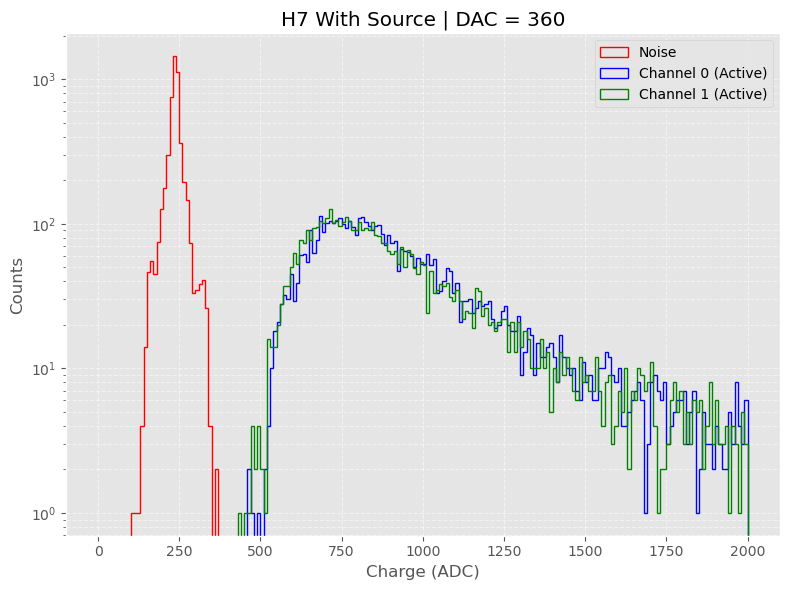

--- Processin Run 28 ---
    Rate = 26.58 +/- 0.38 Hz


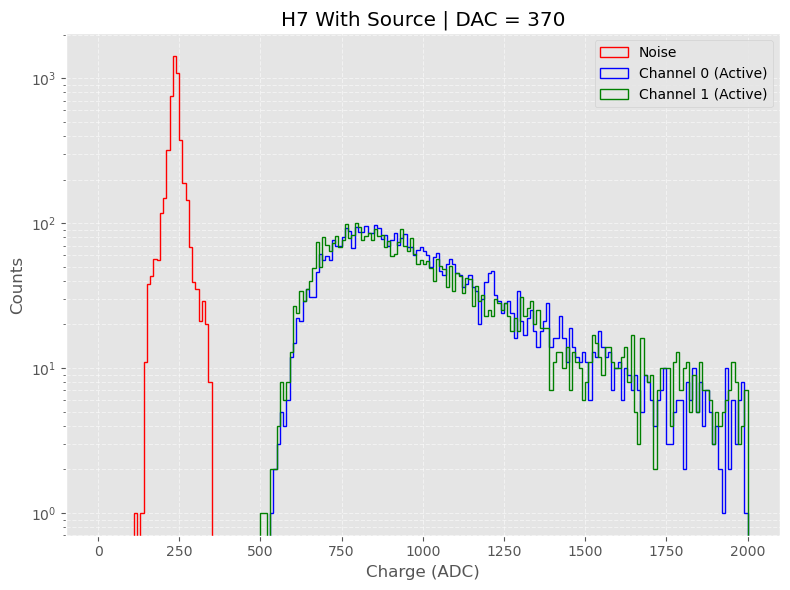

--- Processin Run 29 ---
    Rate = 16.61 +/- 0.23 Hz


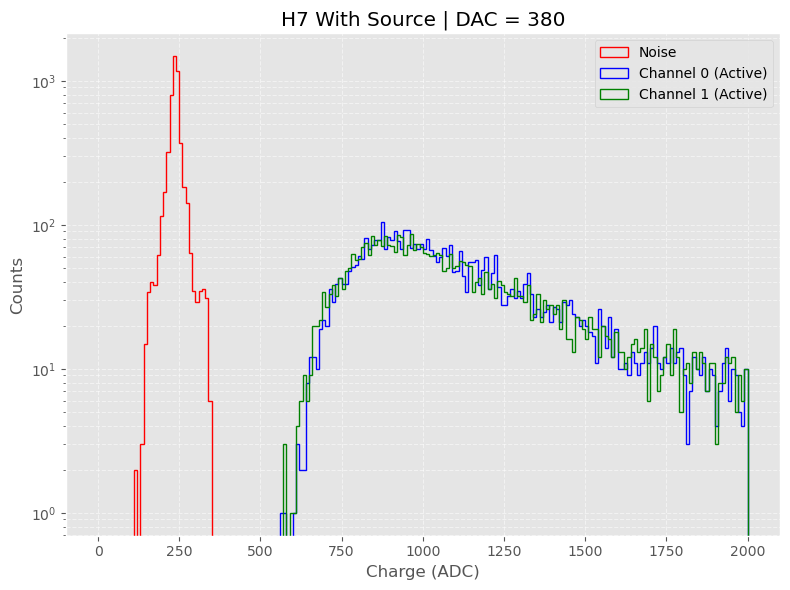

--- Processin Run 30 ---
    Rate = 8.31 +/- 0.12 Hz


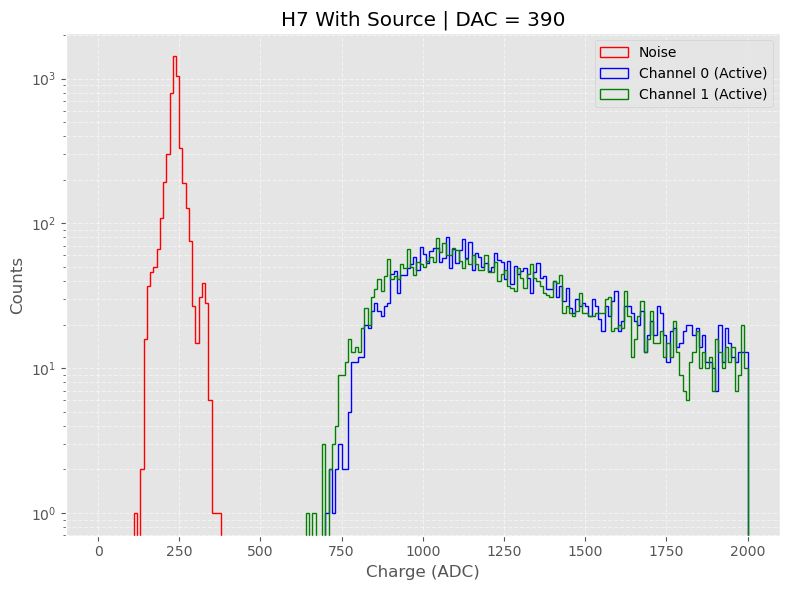

In [37]:
# Global
DATE = '20250807'   # '20250801
BAR  = 'H7'         # 'J7
CHANNELS = [0, 1]

# DataFrame to store rates information
Rates_df = pd.DataFrame(columns=['Run_ID', 'DAC', 'Rate_CV', 'Rate_Err'])

h5_files = sorted(
                    [f for f in os.listdir(os.path.join(DATA_DIR, DATE)) if f.endswith('.h5')],
                    key=lambda x: int(re.search(r'\d+', x).group())
                 )

# ----- Loop Files ----- #
for i, file in enumerate(h5_files):

    # Run information
    h5_path = os.path.join(DATA_DIR, DATE, file)
    run_id = int(re.search(r'\d+', file).group())

    print(f'--- Processin Run {run_id} ---')

    if run_id <= 15:
        DAC = 250 + (i * 10)
        run_label = BAR + ' NO Source | DAC = ' + str(DAC)
    elif run_id > 15:
        DAC = 250 + ((i - 15) * 10)
        run_label = BAR + ' With Source | DAC = ' + str(DAC)

    # Rate
    Rate_CV, Rate_Err = COMPUTE_RATE_FILE(h5_path)
    print(f'    Rate = {Rate_CV:.2f} +/- {Rate_Err:.2f} Hz')

    # Charge histograms
    PLOT_CHARGE_HIST_FILE(h5_path, run_label, SIGNAL_CHANNELS=CHANNELS, X_LIMITS=[0, 2000])

    # Store information
    Rates_df = pd.concat([Rates_df, pd.DataFrame({'Run_ID': [run_id], 'DAC': [DAC], 'Rate_CV': [Rate_CV], 'Rate_Err': [Rate_Err]})], ignore_index=True)

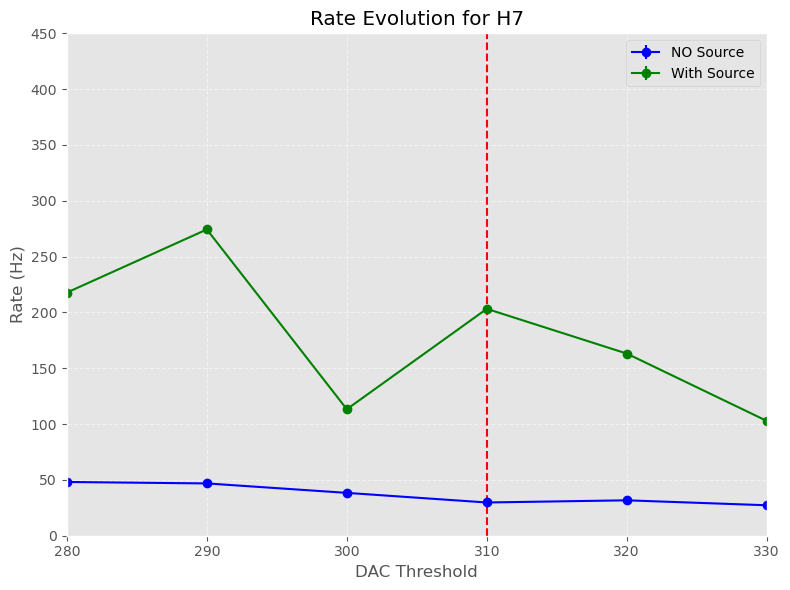

In [40]:
# ----- Rate Evolution ----- #
# Dataframes filtered
no_source_df   = Rates_df[Rates_df['Run_ID'] <= 15]
with_source_df = Rates_df[Rates_df['Run_ID'] > 15]

# ----- Plotting ----- #
plt.figure(figsize=(8, 6))

# NO Source
plt.errorbar(no_source_df['DAC'], no_source_df['Rate_CV'], yerr=no_source_df['Rate_Err'], fmt='o-', label='NO Source', color='blue')
# With Source
plt.errorbar(with_source_df['DAC'], with_source_df['Rate_CV'], yerr=with_source_df['Rate_Err'], fmt='o-', label='With Source', color='green')

# Selected DAC value
plt.axvline(x=310, c='red', ls='--')

# ----- Styling ----- #
plt.xlabel('DAC Threshold')
plt.xticks(sorted(Rates_df['DAC'].unique()))
# plt.xlim(280, 330)
plt.ylabel('Rate (Hz)')
plt.ylim(0, 450)
plt.legend()
plt.title(f'Rate Evolution for {BAR}')

plt.grid(True, ls='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Channel Testing

--- Processin Run 1 ---
    Rate = 44.47 +/- 0.61 Hz


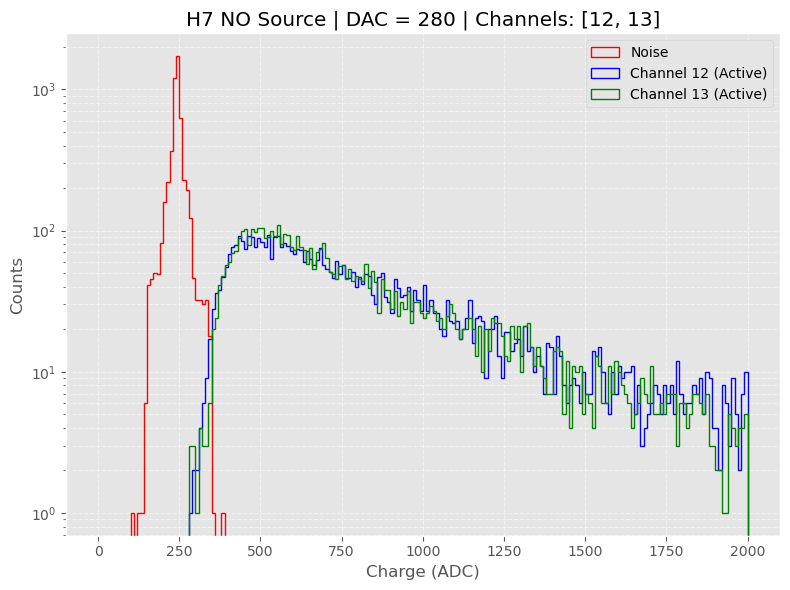

--- Processin Run 2 ---
    Rate = 13.18 +/- 0.19 Hz


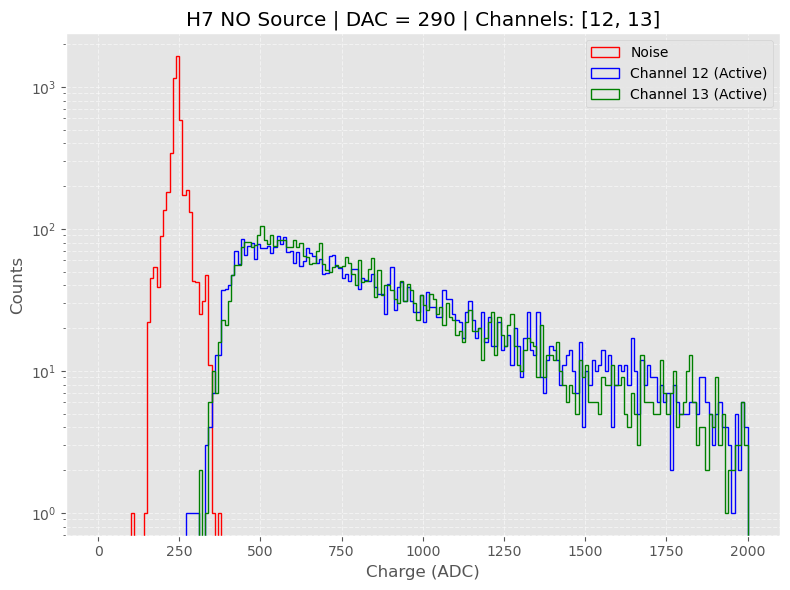

--- Processin Run 3 ---
    Rate = 32.41 +/- 0.46 Hz


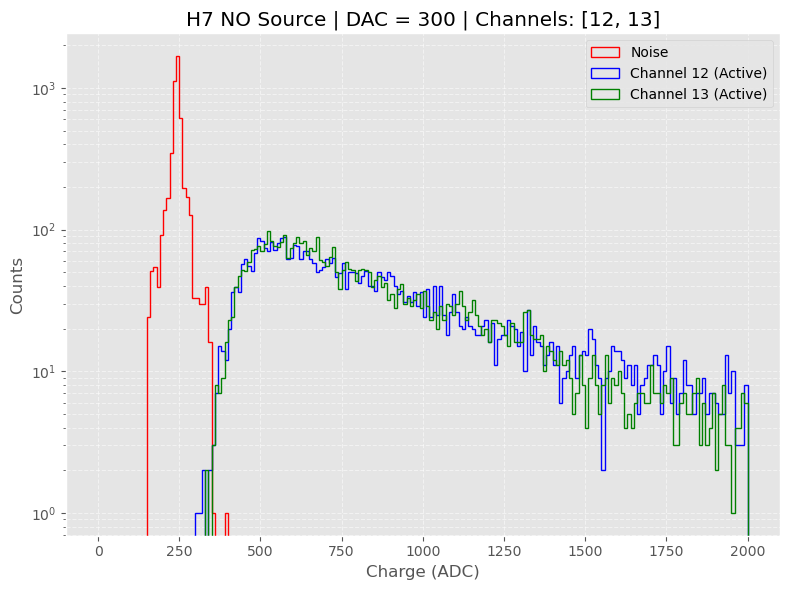

--- Processin Run 4 ---
    Rate = 30.85 +/- 0.44 Hz


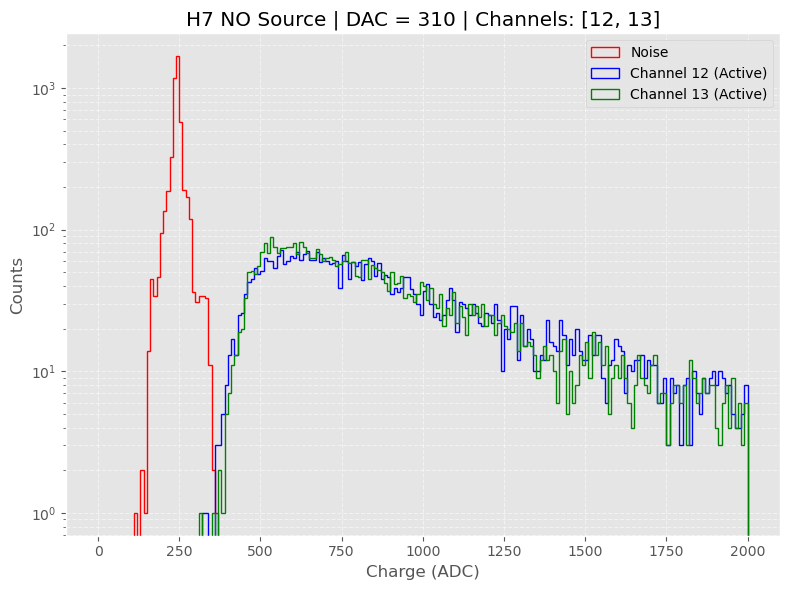

--- Processin Run 5 ---
    Rate = 25.97 +/- 0.37 Hz


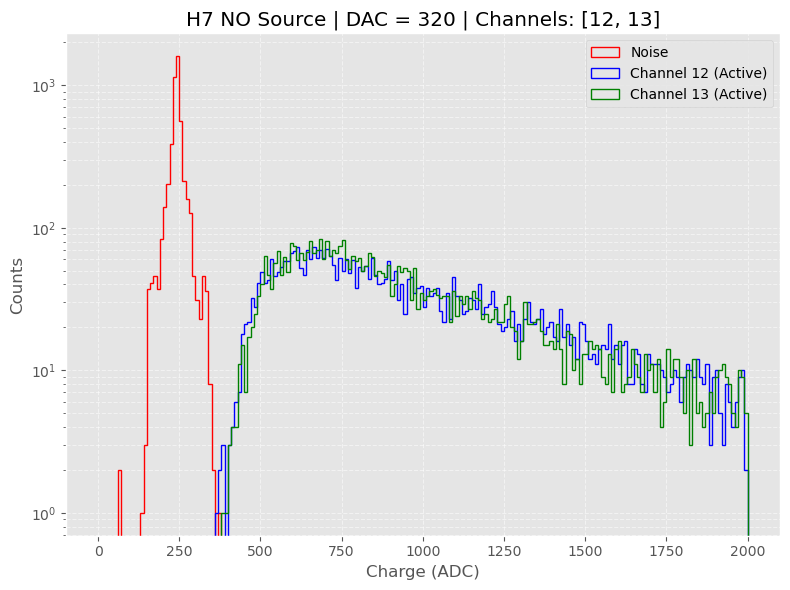

--- Processin Run 6 ---
    Rate = 23.08 +/- 0.33 Hz


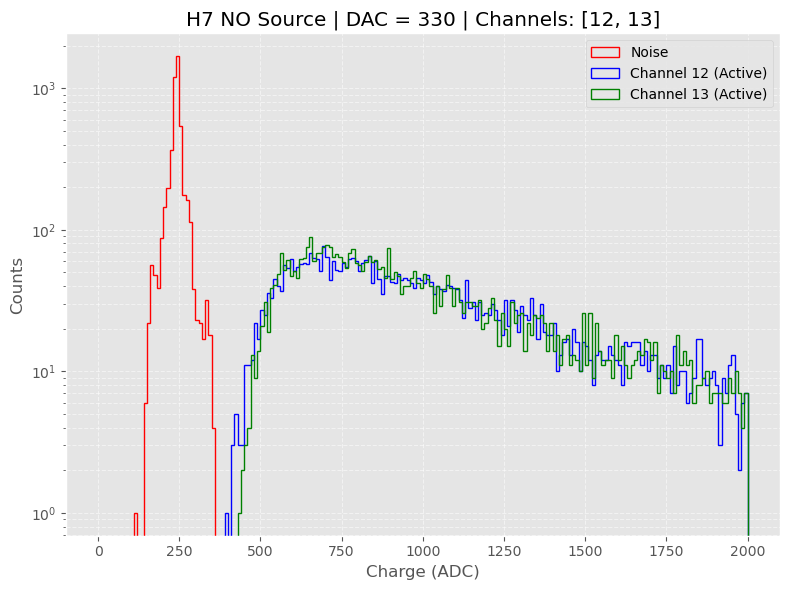

--- Processin Run 7 ---
    Rate = 281.96 +/- 3.89 Hz


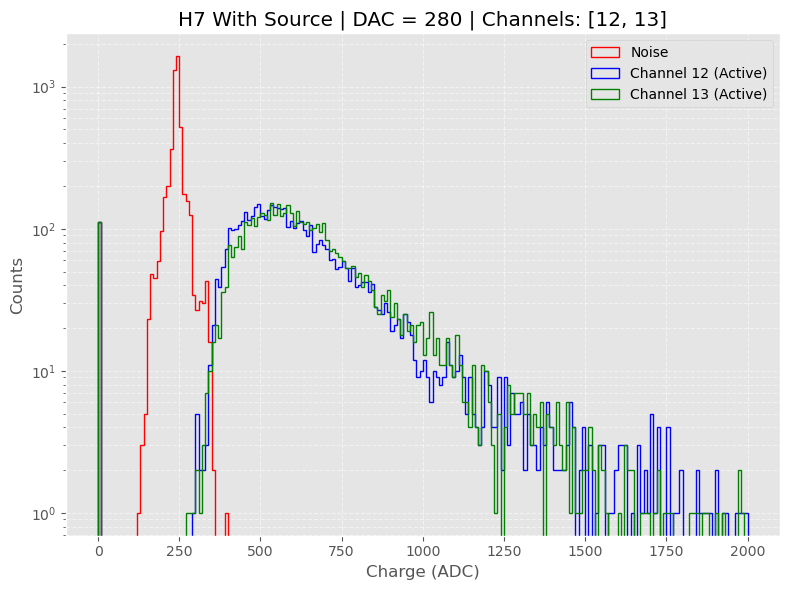

--- Processin Run 8 ---
    Rate = 245.38 +/- 3.38 Hz


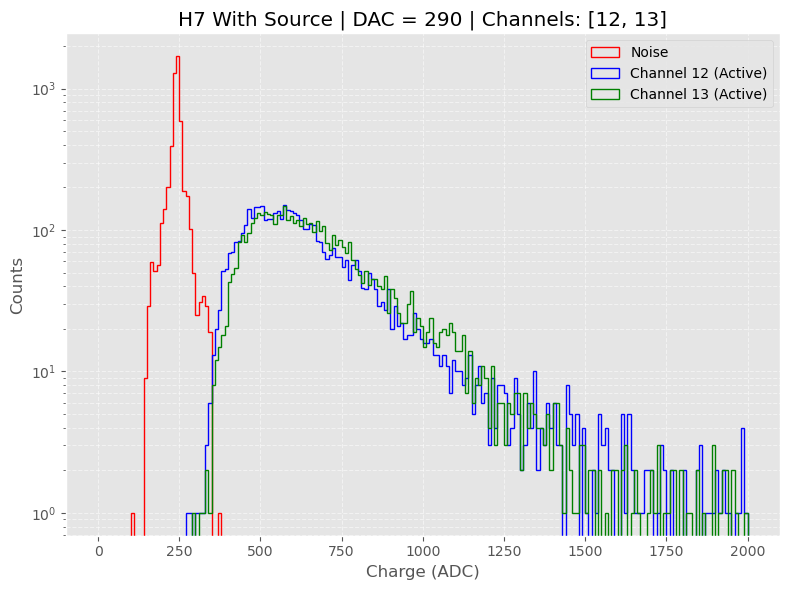

--- Processin Run 9 ---
    Rate = 81.15 +/- 1.13 Hz


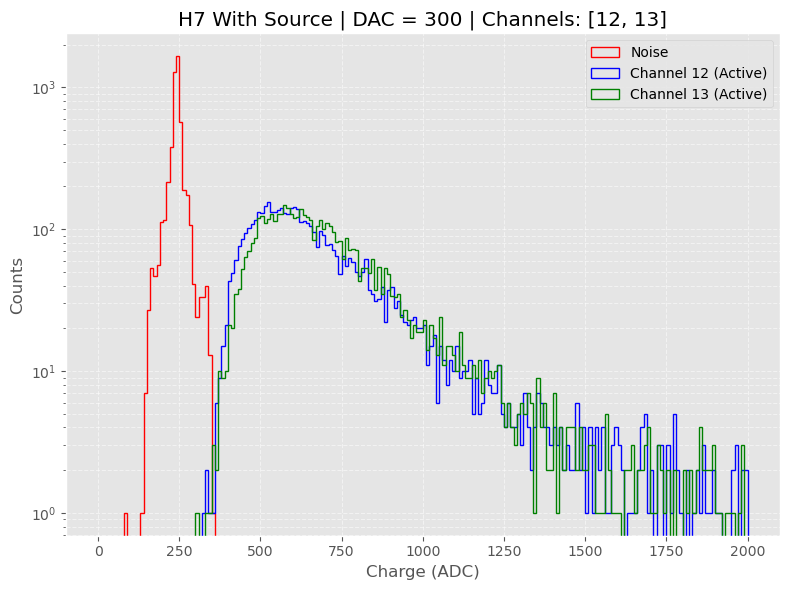

--- Processin Run 10 ---
    Rate = 42.48 +/- 0.60 Hz


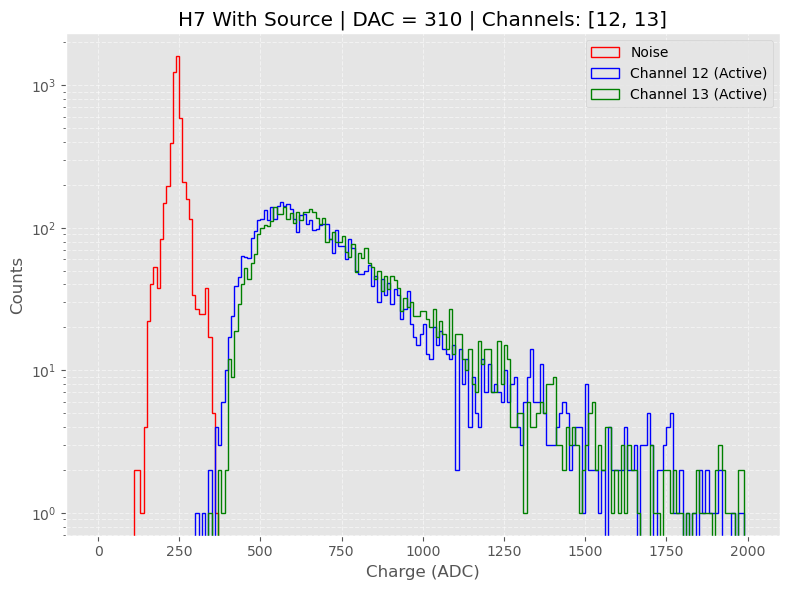

--- Processin Run 11 ---
    Rate = 91.33 +/- 1.28 Hz


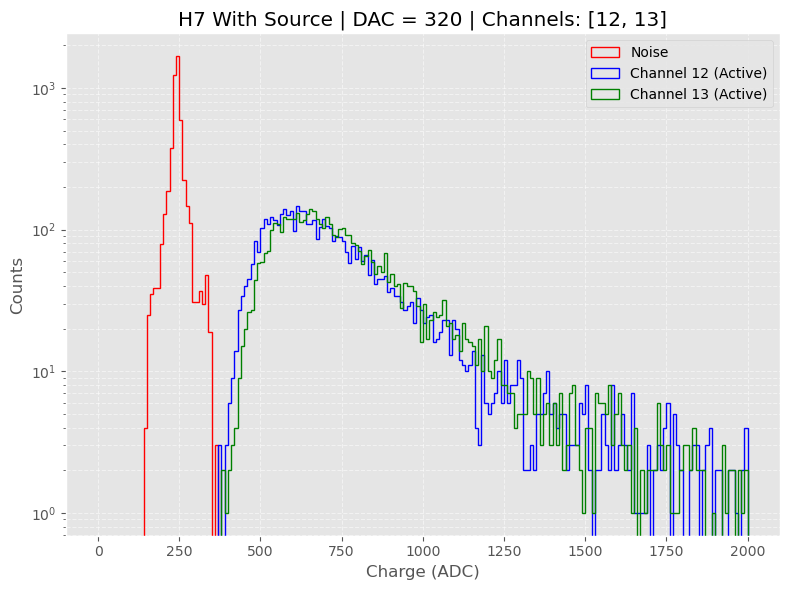

--- Processin Run 12 ---
    Rate = 56.71 +/- 0.80 Hz


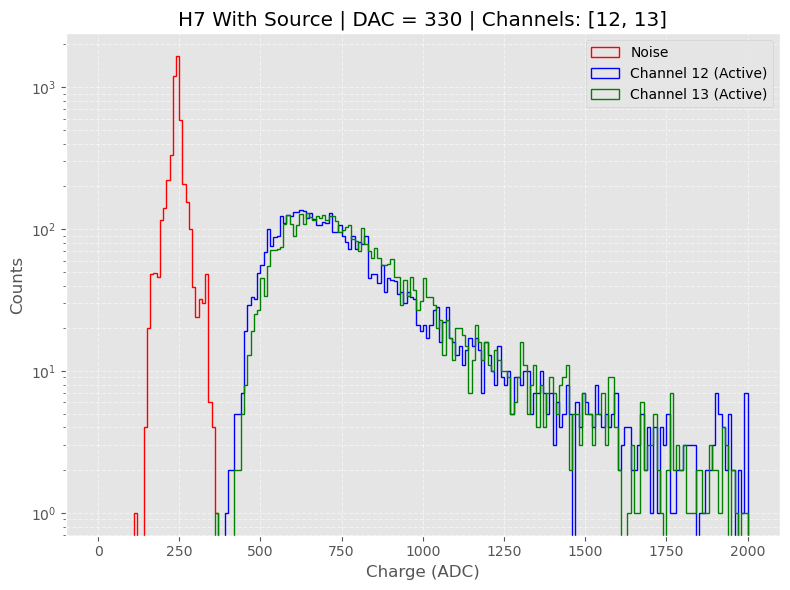

In [36]:
# Global
DATE = '20250813'       # '20250814
BAR  = 'H7'
CHANNELS = [12, 13]     # [6, 7]

# DataFrame to store rates information
Rates_df = pd.DataFrame(columns=['Run_ID', 'DAC', 'Rate_CV', 'Rate_Err'])

h5_files = sorted(
                    [f for f in os.listdir(os.path.join(DATA_DIR, DATE)) if f.endswith('.h5')],
                    key=lambda x: int(re.search(r'\d+', x).group())
                 )

# ----- Loop Files ----- #
for i, file in enumerate(h5_files):

    # Run information
    h5_path = os.path.join(DATA_DIR, DATE, file)
    run_id = int(re.search(r'\d+', file).group())

    print(f'--- Processin Run {run_id} ---')

    if run_id <= 6:
        DAC = 280 + (i * 10)
        run_label = BAR + ' NO Source | DAC = ' + str(DAC) + ' | Channels: ' + str(CHANNELS)
    elif run_id > 6:
        DAC = 280 + ((i - 6) * 10)
        run_label = BAR + ' With Source | DAC = ' + str(DAC) + ' | Channels: ' + str(CHANNELS)

    # Rate
    Rate_CV, Rate_Err = COMPUTE_RATE_FILE(h5_path)
    print(f'    Rate = {Rate_CV:.2f} +/- {Rate_Err:.2f} Hz')

    # Charge histograms
    PLOT_CHARGE_HIST_FILE(h5_path, run_label, SIGNAL_CHANNELS=CHANNELS, X_LIMITS=[0, 2000])

    # Store information
    Rates_df = pd.concat([Rates_df, pd.DataFrame({'Run_ID': [run_id], 'DAC': [DAC], 'Rate_CV': [Rate_CV], 'Rate_Err': [Rate_Err]})], ignore_index=True)

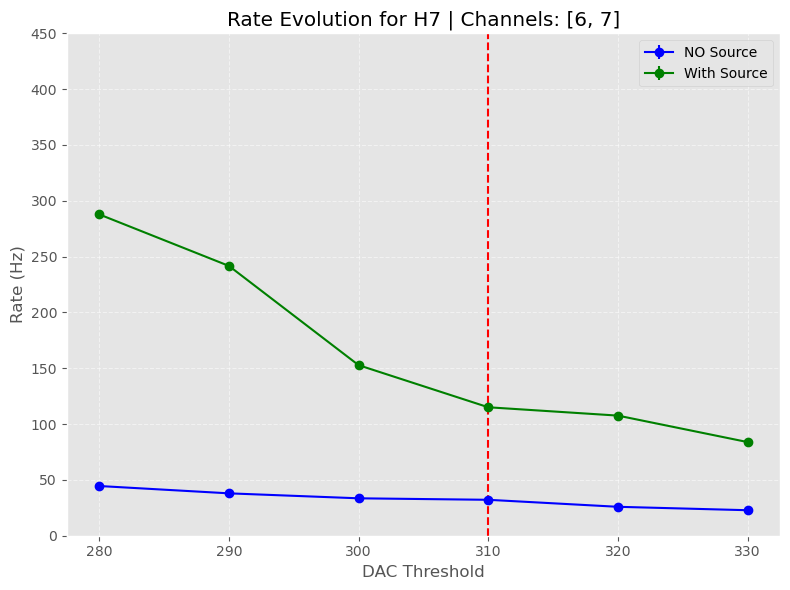

In [35]:
# ----- Rate Evolution ----- #
# Dataframes filtered
no_source_df   = Rates_df[Rates_df['Run_ID'] <= 6]
with_source_df = Rates_df[Rates_df['Run_ID'] > 6]

# ----- Plotting ----- #
plt.figure(figsize=(8, 6))

# NO Source
plt.errorbar(no_source_df['DAC'], no_source_df['Rate_CV'], yerr=no_source_df['Rate_Err'], fmt='o-', label='NO Source', color='blue')
# With Source
plt.errorbar(with_source_df['DAC'], with_source_df['Rate_CV'], yerr=with_source_df['Rate_Err'], fmt='o-', label='With Source', color='green')

# Selected DAC value
plt.axvline(x=310, c='red', ls='--')

# ----- Styling ----- #
plt.xlabel('DAC Threshold')
plt.xticks(sorted(Rates_df['DAC'].unique()))
plt.ylabel('Rate (Hz)')
plt.ylim(0, 450)
plt.legend()
plt.title(f'Rate Evolution for {BAR} | Channels: {CHANNELS}')

plt.grid(True, ls='--', alpha=0.5)
plt.tight_layout()
plt.show()